## HIS Final Project

### Import Packages & Set Parameters

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
import scipy.stats as stats

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Read Data

In [76]:
data = pd.read_csv('Datasets/alzheimers_prediction_dataset_usa_lc.csv')
data.head()

,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,cholesterol_level,family_history,cognitive_test_score,depression_level,sleep_quality,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,Alzheimer’s Diagnosis
0,USA,61,Female,13,33.1,Medium,Former,Never,No,Yes,High,No,51,High,Good,Healthy,High,Employed,Married,No,High,Low,Low,Urban,No
1,USA,55,Male,16,29.9,Medium,Former,Occasionally,No,No,High,No,48,Medium,Poor,Healthy,Low,Retired,Widowed,No,Low,Medium,Low,Rural,No
2,USA,72,Male,2,31.5,Low,Former,Regularly,No,No,Normal,No,75,High,Poor,Average,High,Employed,Widowed,No,High,High,Medium,Urban,No
3,USA,57,Female,0,30.7,Low,Current,Regularly,No,Yes,High,Yes,58,High,Good,Unhealthy,Low,Employed,Single,No,High,Medium,Medium,Rural,No
4,USA,69,Female,12,19.7,High,Former,Regularly,No,No,High,No,83,Medium,Good,Average,Medium,Retired,Married,No,Low,Medium,Low,Urban,No


### Data Cleaning

In [77]:
data

,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,cholesterol_level,family_history,cognitive_test_score,depression_level,sleep_quality,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,Alzheimer’s Diagnosis
0,USA,61,Female,13,33.1,Medium,Former,Never,No,Yes,High,No,51,High,Good,Healthy,High,Employed,Married,No,High,Low,Low,Urban,No
1,USA,55,Male,16,29.9,Medium,Former,Occasionally,No,No,High,No,48,Medium,Poor,Healthy,Low,Retired,Widowed,No,Low,Medium,Low,Rural,No
2,USA,72,Male,2,31.5,Low,Former,Regularly,No,No,Normal,No,75,High,Poor,Average,High,Employed,Widowed,No,High,High,Medium,Urban,No
3,USA,57,Female,0,30.7,Low,Current,Regularly,No,Yes,High,Yes,58,High,Good,Unhealthy,Low,Employed,Single,No,High,Medium,Medium,Rural,No
4,USA,69,Female,12,19.7,High,Former,Regularly,No,No,High,No,83,Medium,Good,Average,Medium,Retired,Married,No,Low,Medium,Low,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,USA,64,Female,18,26.4,High,Never,Never,No,Yes,Normal,Yes,41,Low,Good,Average,Low,Employed,Widowed,No,Low,Medium,Low,Urban,No
3612,USA,78,Female,1,34.2,Medium,Current,Regularly,No,No,Normal,No,41,Low,Poor,Unhealthy,Low,Unemployed,Widowed,Yes,Medium,High,Low,Urban,No
3613,USA,74,Female,13,23.1,High,Former,Never,Yes,Yes,Normal,No,82,Low,Good,Unhealthy,Medium,Retired,Widowed,No,Low,High,Low,Rural,No
3614,USA,87,Female,7,18.9,High,Never,Occasionally,No,No,Normal,No,68,High,Average,Unhealthy,Low,Unemployed,Single,No,Medium,High,Medium,Urban,Yes


In [78]:
# Rename the column with special character and drop the country column
data.rename(columns={"Alzheimer’s Diagnosis": "Alzheimer's Diagnosis"}, inplace=True)
data.drop(columns=['country'], inplace=True)
data.columns

Index(['age', 'gender', 'education_level', 'bmi', 'physical_activity_level',
       'smoking_status', 'alcohol_consumption', 'diabetes', 'hypertension',
       'cholesterol_level', 'family_history', 'cognitive_test_score',
       'depression_level', 'sleep_quality', 'dietary_habits',
       'air_pollution_exposure', 'employment_status', 'marital_status',
       'genetic_risk_factor', 'social_engagement_level', 'income_level',
       'stress_levels', 'urban_vs_rural_living', 'Alzheimer's Diagnosis'],
      dtype='object')

### Exploratory Data Analysis

#### Descriptive Analysis

In [79]:
# Check data types and null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      3616 non-null   int64  
 1   gender                   3616 non-null   object 
 2   education_level          3616 non-null   int64  
 3   bmi                      3616 non-null   float64
 4   physical_activity_level  3616 non-null   object 
 5   smoking_status           3616 non-null   object 
 6   alcohol_consumption      3616 non-null   object 
 7   diabetes                 3616 non-null   object 
 8   hypertension             3616 non-null   object 
 9   cholesterol_level        3616 non-null   object 
 10  family_history           3616 non-null   object 
 11  cognitive_test_score     3616 non-null   int64  
 12  depression_level         3616 non-null   object 
 13  sleep_quality            3616 non-null   object 
 14  dietary_habits          

In [80]:
# Perform descriptive statistics for both numerical and categorical columns
print("----------- Descriptive Statistics of Numerical Columns -----------")
print(data.describe().T.round(2))
print("\n---------- Descriptive Statistics of Categorical Columns -----------")
print(data.describe(include='object').T[['count', 'unique', 'top', 'freq']]) 

----------- Descriptive Statistics of Numerical Columns -----------
                       count   mean    std   min   25%   50%   75%   max
age                   3616.0  72.28  12.96  50.0  61.0  72.0  83.0  94.0
education_level       3616.0   9.56   5.80   0.0   5.0  10.0  15.0  19.0
bmi                   3616.0  26.77   4.82  18.5  22.5  26.8  31.0  35.0
cognitive_test_score  3616.0  64.20  20.03  30.0  47.0  64.0  82.0  99.0

---------- Descriptive Statistics of Categorical Columns -----------
                        count unique        top  freq
gender                   3616      2     Female  1863
physical_activity_level  3616      3        Low  1225
smoking_status           3616      3    Current  1220
alcohol_consumption      3616      3  Regularly  1216
diabetes                 3616      2         No  2935
hypertension             3616      2         No  2583
cholesterol_level        3616      2     Normal  2533
family_history           3616      2         No  2537
depression_

#### Univariate Analysis
This section focuses on analyzing each variable individually to understand its distribution, central tendency, and variability. The goal is to summarize the key characteristics of each variable and identify any patterns or anomalies within the dataset.

##### Continuous Variables

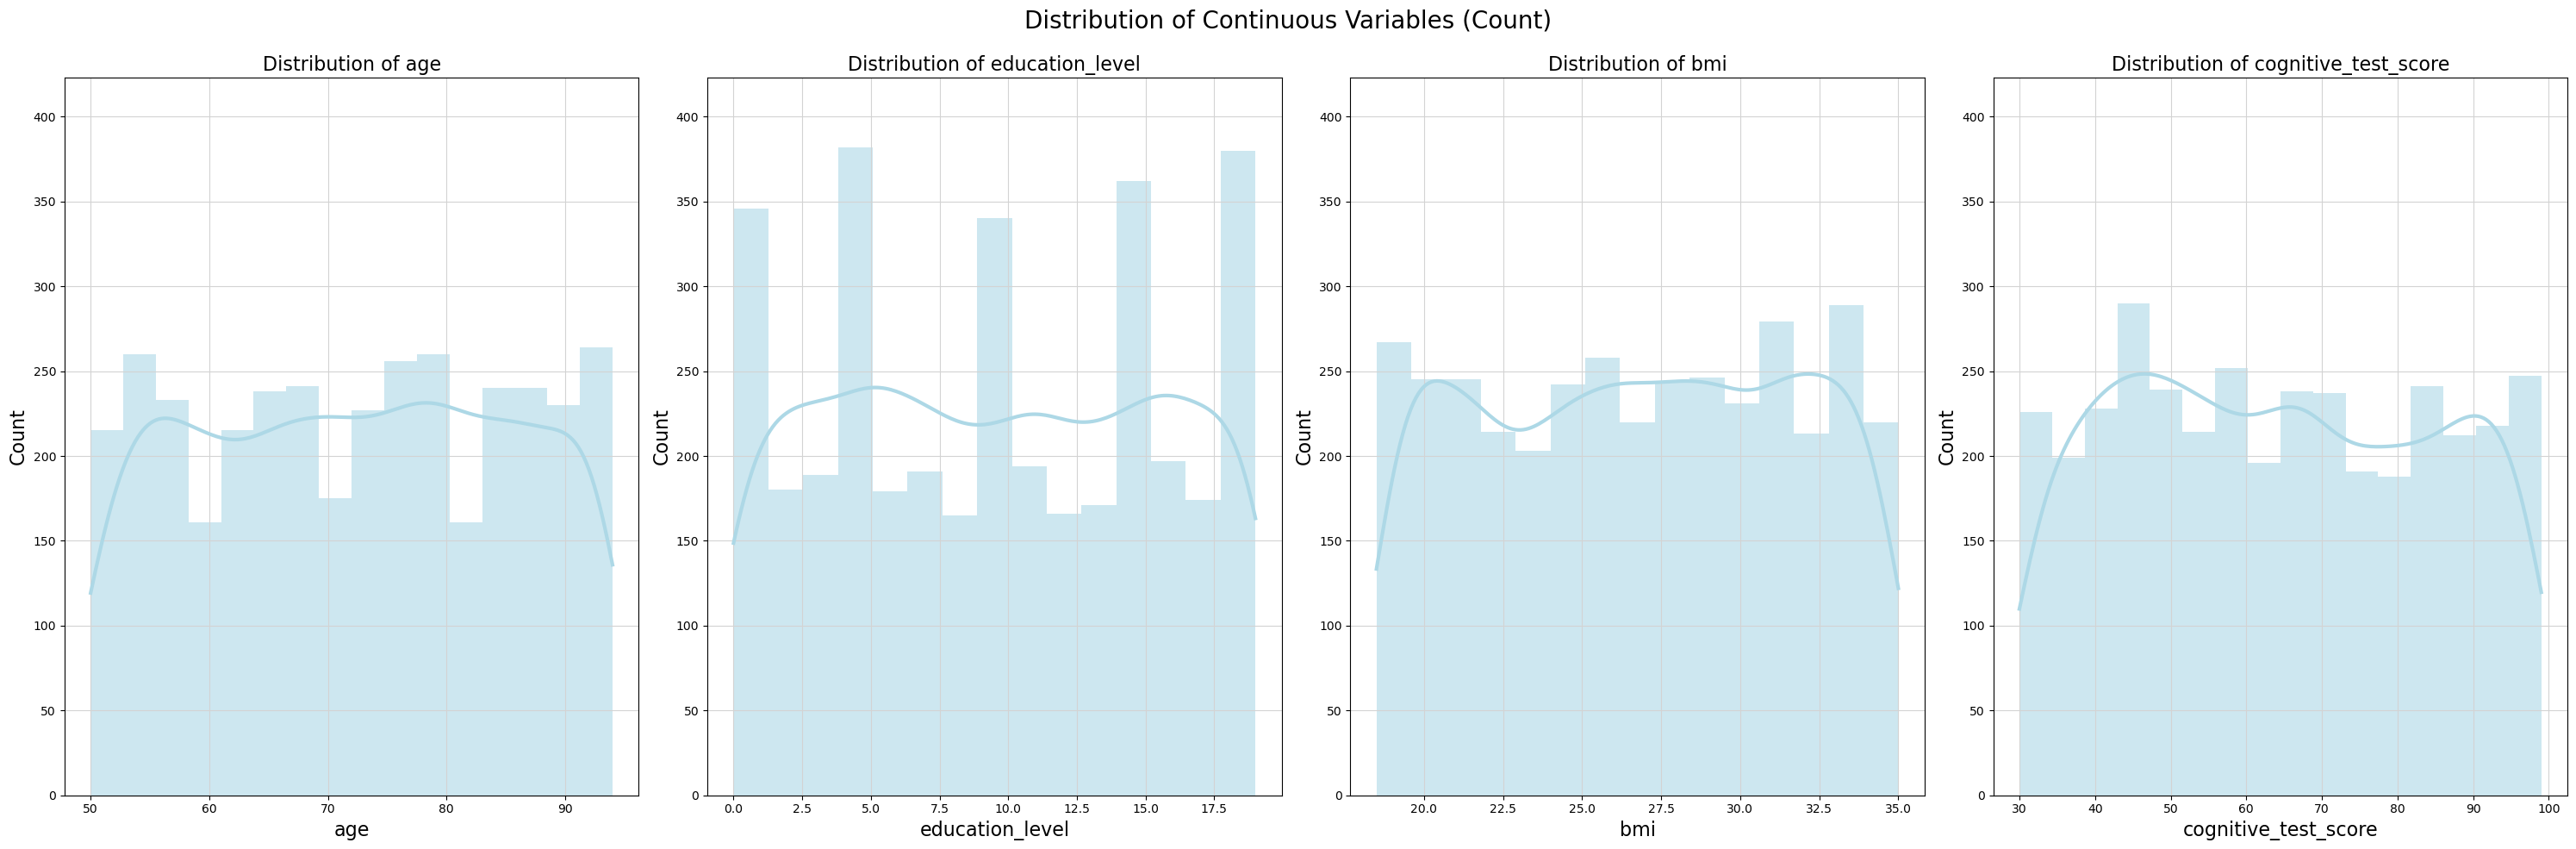

In [81]:
con_features = ['age', 'education_level', 'bmi', 'cognitive_test_score']
cat_features = data.columns.difference(con_features).drop('Alzheimer\'s Diagnosis')
data_con = data[con_features]

# Set up the subplot with 1 row and 4 columns, increase the width
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 10))  # Increased width to 30 for wider graphs

# Determine global y-axis limit across all variables
global_ymax = 0
for col in con_features:
    counts, _ = np.histogram(data_con[col].dropna())
    global_ymax = max(global_ymax, counts.max())

# Plot histograms for each continuous variable
for i, col in enumerate(con_features):
    graph = sns.histplot(data=data_con, x=col, kde=True, ax=ax[i],
                         edgecolor='none', color='lightblue', alpha=0.6, line_kws={'lw': 3})
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel('Count', fontsize=16)  # Y-axis label as "Count"
    ax[i].set_title(f'Distribution of {col}', fontsize=16)
    ax[i].grid(color='lightgrey')
    ax[i].set_ylim(0, global_ymax)  # Apply global y-axis limit

# Add a main title for the entire figure
plt.suptitle('Distribution of Continuous Variables (Count)', fontsize=20)  # Main title
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The distributions of the four continuous variables appear consistent with expectations for a dataset focused on Alzheimer’s risk. Age is evenly distributed across older adults, reflecting a well-represented aging population. Education level shows distinct spikes at common schooling milestones (e.g., 0, 9, 18 years), indicating clustering around formal education stages. BMI is nearly uniformly distributed between 18 and 35. Cognitive test scores are also relatively uniform but show subtle bimodal tendencies, possibly distinguishing individuals with strong cognitive function from those with cognitive decline. No significant anomalies are observed.

##### Categorical Variables

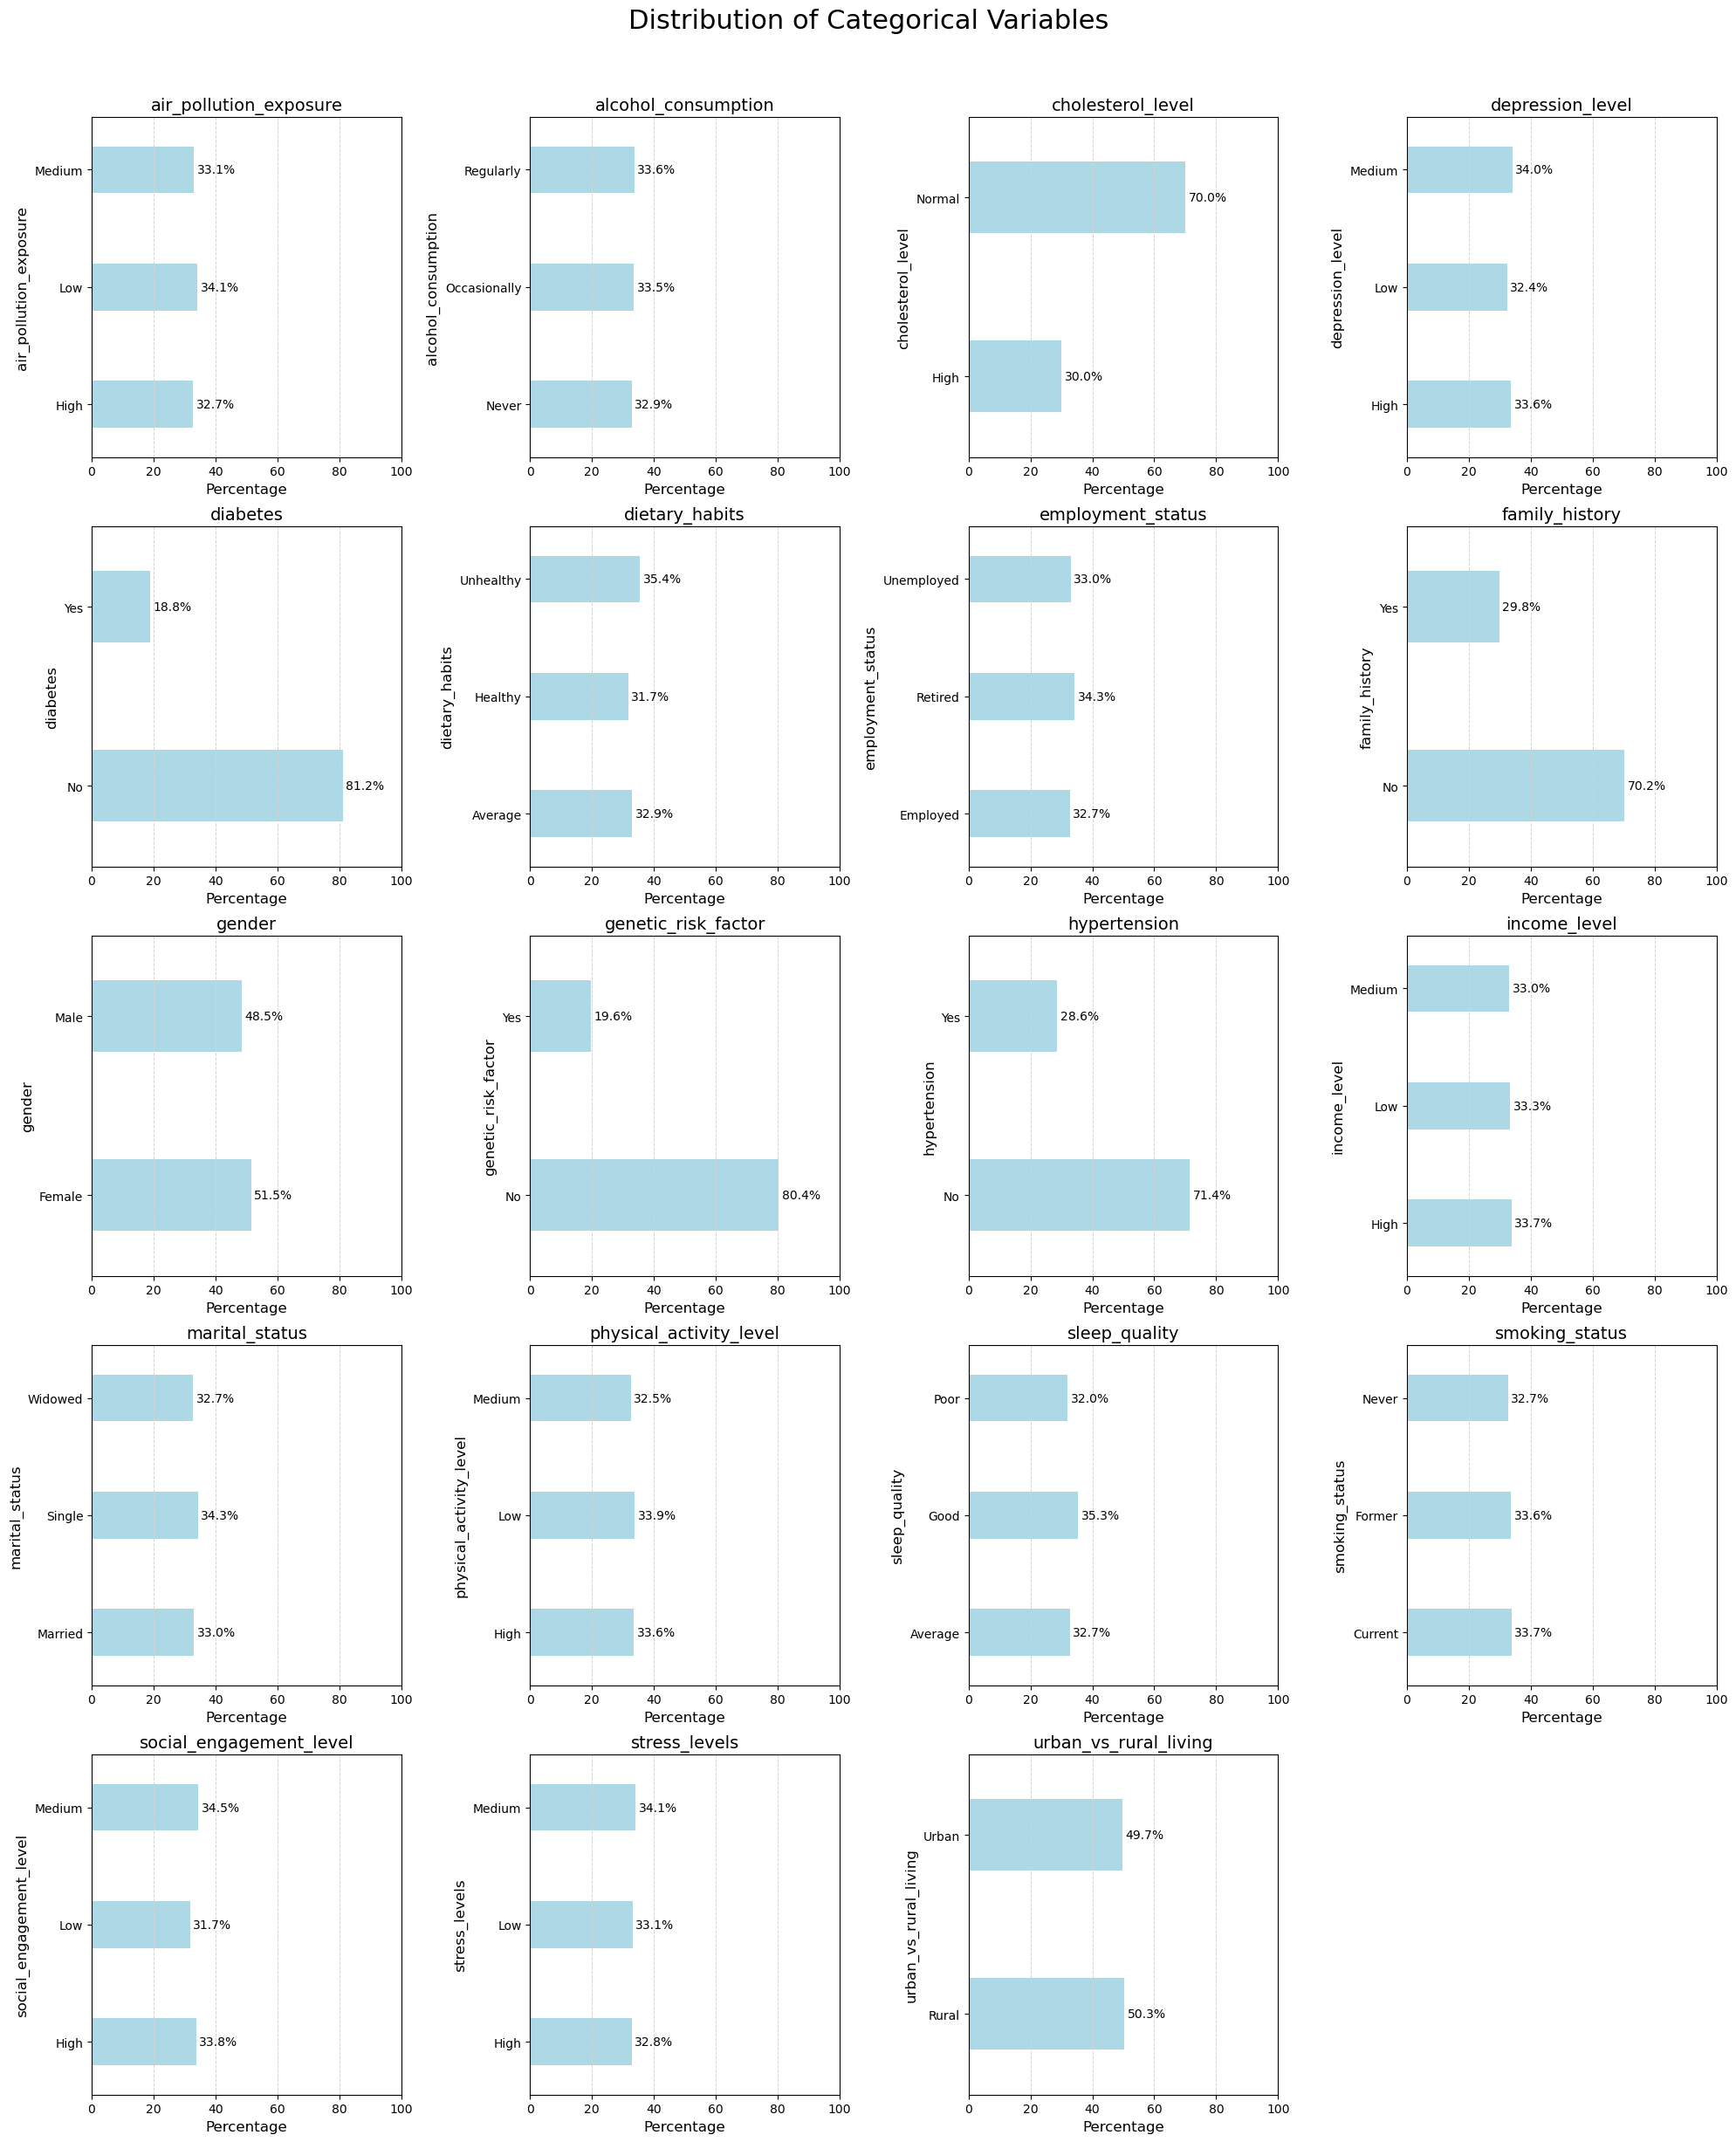

In [82]:
# Determine the number of rows needed based on the number of categorical features
n_features = len(cat_features)
n_cols = 4  # Set 4 graphs in a row
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows dynamically

# Set up the subplot for a dynamic layout
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
ax = ax.flatten()  # Flatten the axes array for easier indexing

# Loop to plot horizontal bar charts for each categorical feature
for i, col in enumerate(cat_features):
    # Calculate frequency percentages for the entire dataset
    counts = data[col].value_counts(normalize=True).mul(100).sort_index()
    
    # Plot horizontal bar chart
    counts.plot(kind='barh', ax=ax[i], color='lightblue', width=0.4)  # Single color for all bars
    
    # Add percentage annotations to the bars
    for bar in ax[i].containers[0]:
        width = bar.get_width()
        if width > 0:  # Only annotate bars with non-zero values
            ax[i].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', 
                       va='center', ha='left', fontsize=10, color='black')

    # Set labels and title
    ax[i].set_ylabel(col, fontsize=12)
    ax[i].set_xlabel('Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=14)
    ax[i].set_xlim([0, 100])
    ax[i].grid(axis='x', color='lightgrey', linestyle='--', linewidth=0.7)

# Turn off any unused axes
for j in range(len(cat_features), len(ax)):
    ax[j].axis('off')

# Adjust the space below the title
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Reduce the top margin to make the space below the title smaller
plt.show()

#### Bivariate Analysis
This section explores the relationships between pairs of variables, with a particular focus on how independent variables relate to the dependent variable—Alzheimer’s diagnosis. By identifying patterns and differences across groups, we aim to uncover variables that are more predictive and suitable for inclusion in the model.

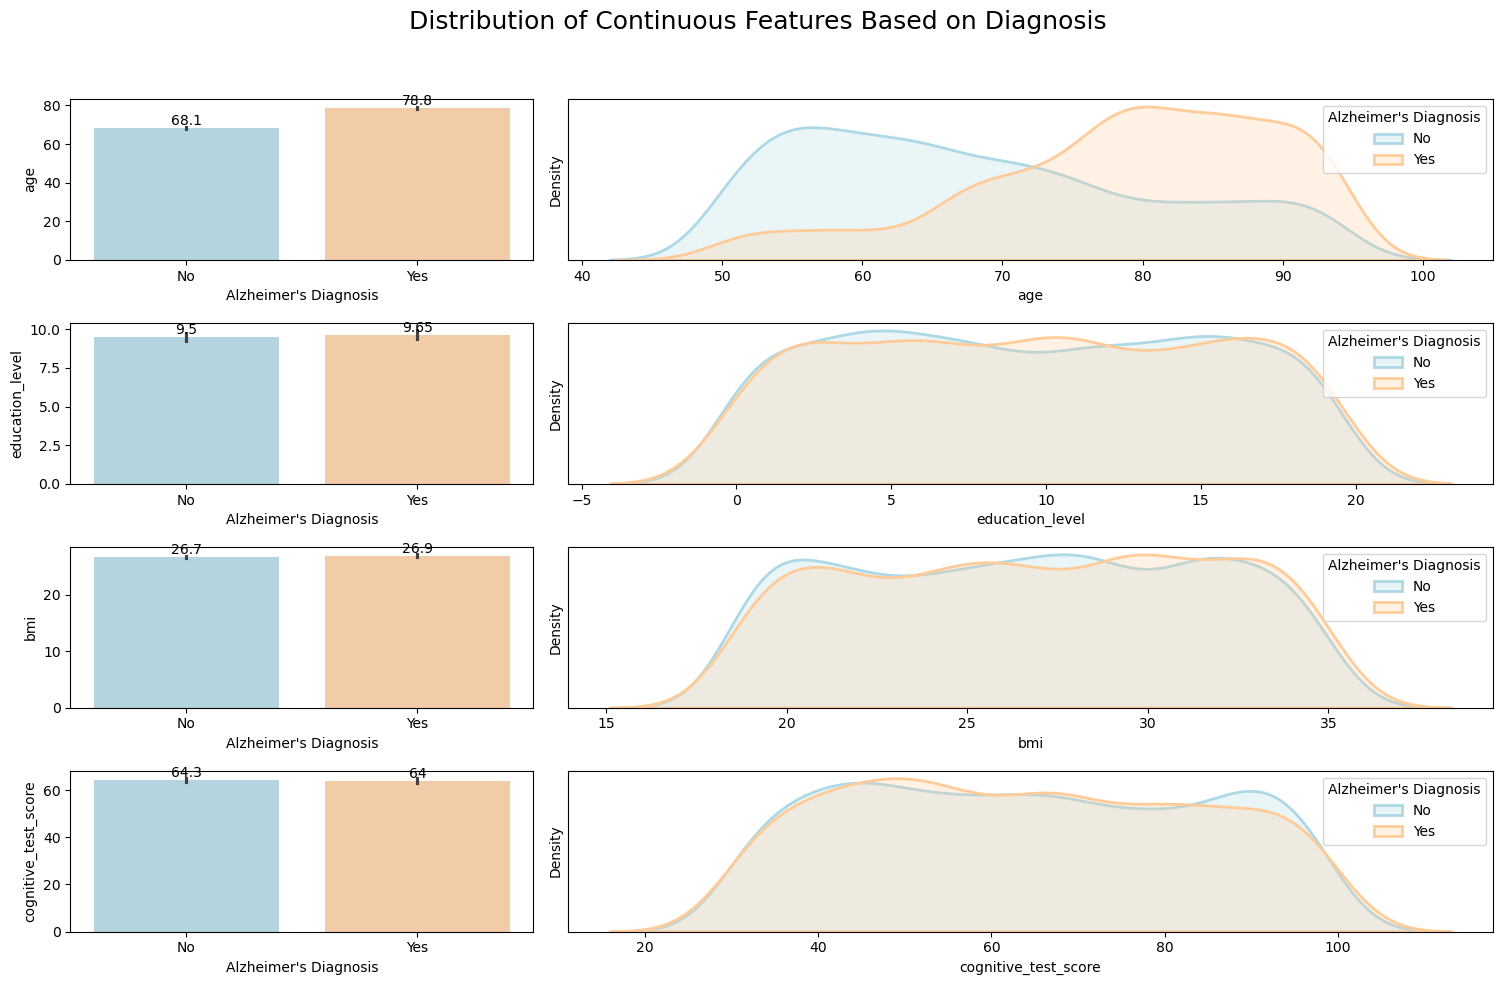

In [83]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

# Set color palette
sns.set_palette(['#add8e6', '#ffcc99'])  # Light blue for No, Light orange for Yes

# Create the subplots
fig, ax = plt.subplots(len(con_features), 2, figsize=(15, 2.5 * len(con_features)), gridspec_kw={'width_ratios': [1, 2]})  # Reduced figure size

# Loop through each continuous feature to create barplots and KDE plots
for i, col in enumerate(con_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="Alzheimer\'s Diagnosis", y=col, ax=ax[i, 0], palette=['#add8e6', '#ffcc99'])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["Alzheimer\'s Diagnosis"] == 'No'], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='No', color='#add8e6')
    sns.kdeplot(data=data[data["Alzheimer\'s Diagnosis"] == 'Yes'], x=col, fill=True, linewidth=2, ax=ax[i, 1], label='Yes', color='#ffcc99')
    ax[i, 1].set_yticks([])
    ax[i, 1].legend(title='Alzheimer\'s Diagnosis', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='%.3g')

# Set the title for the entire figure
plt.suptitle('Distribution of Continuous Features Based on Diagnosis', fontsize=18)  # Reduced title font size
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

The comparison of continuous variables by Alzheimer’s diagnosis reveals that age is the most distinguishing factor, with individuals diagnosed with Alzheimer’s averaging 78.8 years old compared to 68.1 for those without a diagnosis. This strong age difference is clearly reflected in the shifted density distribution and highlights age as a key risk factor. In contrast, education level and BMI show nearly identical averages and highly overlapping distributions between the two groups, suggesting minimal association with diagnosis status. Cognitive test scores also have similar means across groups, but the density plot reveals a slightly flatter and broader distribution for the diagnosed group, hinting at greater variability and possible subgroups. Overall, age emerges as the most predictive continuous feature, while the others may require further analysis to uncover meaningful patterns.

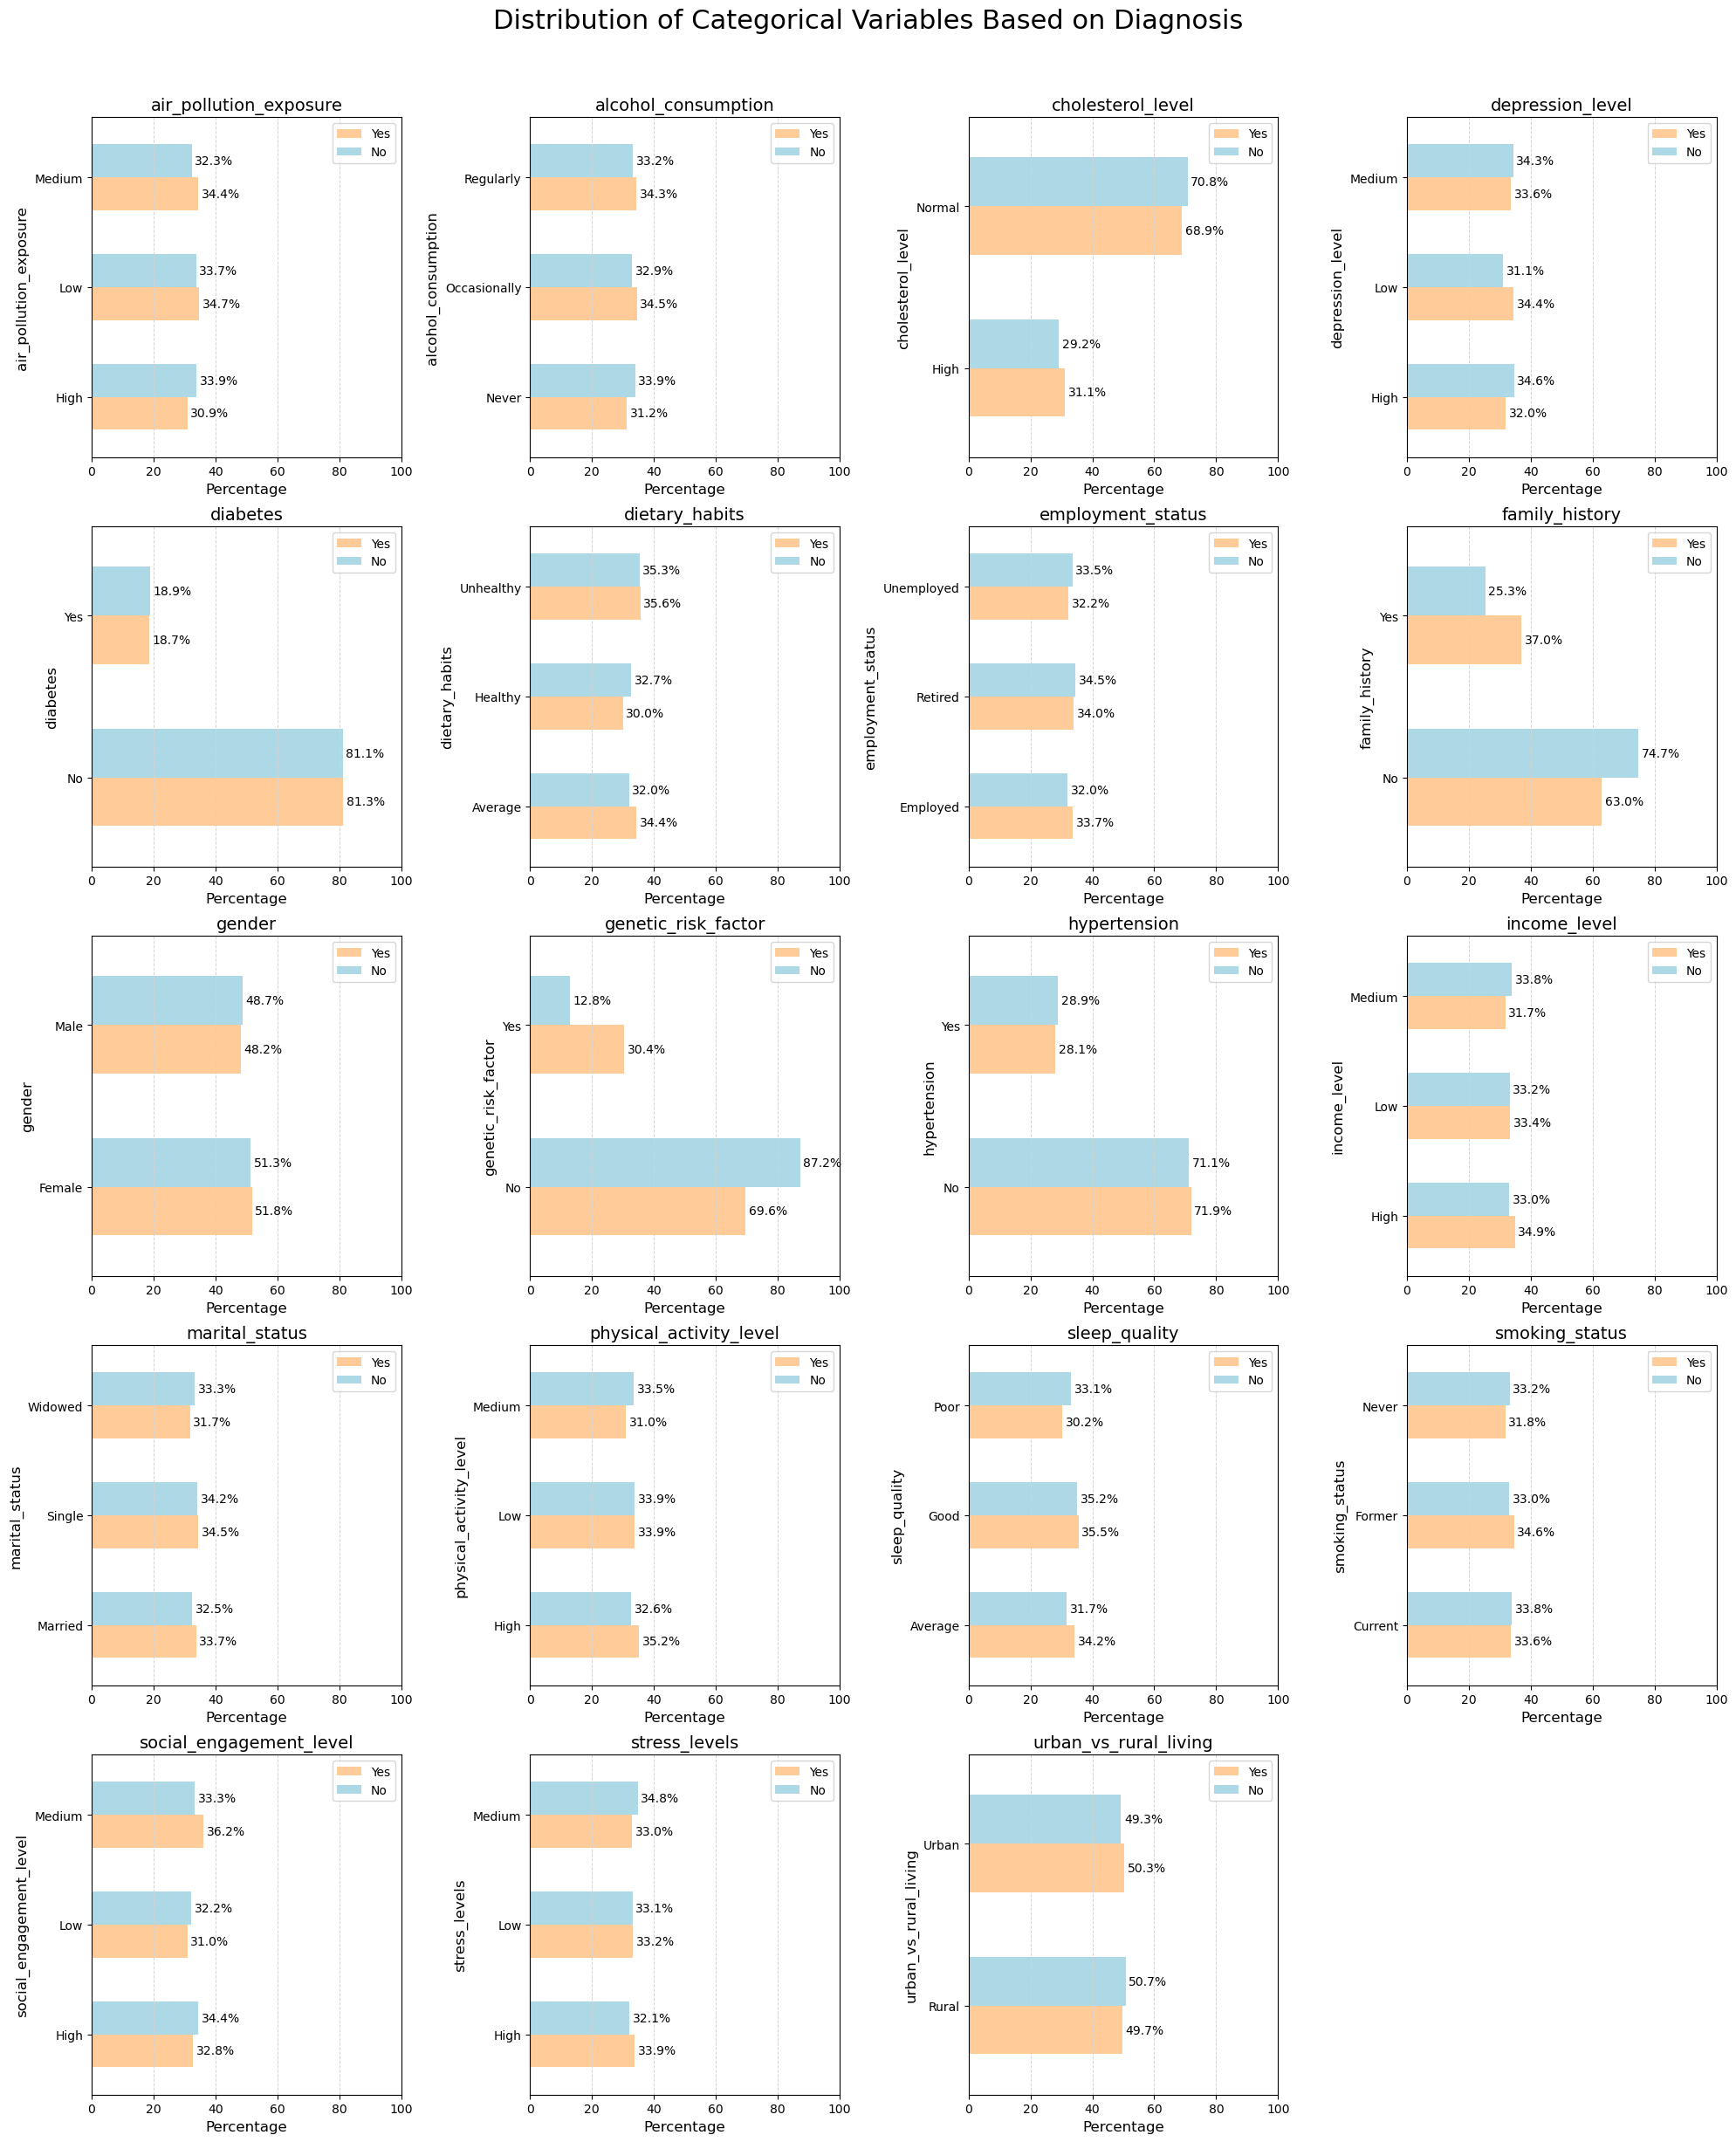

In [84]:
# Filter out categorical features for the univariate analysis, excluding 'Alzheimer\'s Diagnosis'
cat_features = data.columns.difference(con_features).drop('Alzheimer\'s Diagnosis')
alz_yes_cat = data[data['Alzheimer\'s Diagnosis'] == 'Yes'][cat_features]
alz_no_cat = data[data['Alzheimer\'s Diagnosis'] == 'No'][cat_features]

# Determine the number of rows needed based on the number of categorical features
n_features = len(cat_features)
n_cols = 4  # Set 4 graphs in a row
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows dynamically

# Set up the subplot for a dynamic layout
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
ax = ax.flatten()  # Flatten the axes array for easier indexing

# Loop to plot grouped horizontal bar charts for each categorical feature
for i, col in enumerate(cat_features):
    # Calculate frequency percentages for both groups
    yes_counts = alz_yes_cat[col].value_counts(normalize=True).mul(100).sort_index()
    no_counts = alz_no_cat[col].value_counts(normalize=True).mul(100).sort_index()
    
    # Align the indices of both groups
    all_categories = yes_counts.index.union(no_counts.index)
    yes_counts = yes_counts.reindex(all_categories, fill_value=0)
    no_counts = no_counts.reindex(all_categories, fill_value=0)
    
    # Create a DataFrame for plotting
    grouped_data = pd.DataFrame({'Yes': yes_counts, 'No': no_counts})
    
    # Plot grouped horizontal bar chart with thinner bars
    grouped_data.plot(kind='barh', ax=ax[i], color=['#ffcc99', '#add8e6'], width=0.6)  # Reduced width for thinner bars
    
    # Add percentage annotations to the bars
    for bar_group in ax[i].containers:
        for bar in bar_group:
            width = bar.get_width()
            if width > 0:  # Only annotate bars with non-zero values
                ax[i].text(width + 1, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', 
                           va='center', ha='left', fontsize=10, color='black')

    # Set labels and title
    ax[i].set_ylabel(col, fontsize=12)
    ax[i].set_xlabel('Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=14)
    ax[i].set_xlim([0, 100])
    ax[i].grid(axis='x', color='lightgrey', linestyle='--', linewidth=0.7)

    # Remove the legend title
    ax[i].legend(title=None)

# Turn off any unused axes
for j in range(len(cat_features), len(ax)):
    ax[j].axis('off')

# Adjust the space below the title
plt.suptitle('Distribution of Categorical Variables Based on Diagnosis', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Reduce the top margin to make the space below the title smaller
plt.show()

The graphs compare the distribution of categorical variables between individuals diagnosed with Alzheimer’s and those without. Several variables show noticeable differences between groups.

Notably, a higher percentage of individuals with Alzheimer’s report a genetic risk factor (30.4%) and a family history of Alzheimer’s (37.0%) compared to those without (12.8% and 25.7%, respectively), highlighting their potential predictive value. In contrast, variables such as demongraphic variables (e.g. gender, income_level, urban vs. rural living) and lifestyle variables (e.g. sleep_quality, stress_levels) appear similarly distributed across both groups, suggesting weaker associations with diagnosis. 

Overall, the analysis reveals that genetic and familial factors tend to differ more meaningfully between diagnosed and non-diagnosed individuals, indicating their relevance for further modeling or risk prediction.

#### Correlation Analysis
While the earlier bivariate analysis allowed for visual and group-based comparisons between individual variables and Alzheimer’s diagnosis, the correlation analysis provides a more systematic and quantitative assessment of these relationships. By measuring the strength and direction of associations, correlation analysis allows for clearer prioritization of potential predictors and highlights subtle but statistically meaningful patterns that may not be easily observed through bivariate plots alone.

In [85]:
from scipy.stats import chi2_contingency


# Encode 'Alzheimer\'s Diagnosis' as a binary variable
data['Diagnosis_Binary'] = data['Alzheimer\'s Diagnosis'].map({'Yes': 1, 'No': 0})

# Select numerical columns for correlation
numerical_columns = con_features + ['Diagnosis_Binary']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Extract correlations with 'Diagnosis_Binary'
diagnosis_correlation = correlation_matrix.loc[:,['Diagnosis_Binary']].drop('Diagnosis_Binary')
diagnosis_correlation.rename(columns={'Diagnosis_Binary': 'Correlation'}, inplace=True)

# Define a function to calculate Cramér's V
def cramers_v(confusion_matrix):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Compute Cramér's V for each categorical column
cat_features = data.select_dtypes(include=['object']).columns.drop('Alzheimer\'s Diagnosis')
categorical_correlations = {}
for col in cat_features:
    confusion_matrix = pd.crosstab(data[col], data['Alzheimer\'s Diagnosis'])
    categorical_correlations[col] = cramers_v(confusion_matrix.values)

# Combine numerical and categorical correlations into a single DataFrame
numerical_corr_df = pd.DataFrame(diagnosis_correlation, columns=['Correlation'])
numerical_corr_df['Type'] = 'Numerical'


categorical_corr_df = pd.DataFrame.from_dict(categorical_correlations, orient='index', columns=['Correlation'])
categorical_corr_df['Type'] = 'Categorical'

# Concatenate the two DataFrames
overall_correlation = pd.concat([numerical_corr_df, categorical_corr_df])

# Sort the correlations in descending order
overall_correlation = overall_correlation.sort_values(by='Correlation', ascending=False)

# Display the overall correlation ranking
print("Overall Correlation Ranking with Alzheimer's Diagnosis:")
print(overall_correlation)

Overall Correlation Ranking with Alzheimer's Diagnosis:
                         Correlation         Type
age                         0.402253    Numerical
genetic_risk_factor         0.215143  Categorical
family_history              0.124315  Categorical
depression_level            0.037152  Categorical
sleep_quality               0.032847  Categorical
air_pollution_exposure      0.032149  Categorical
dietary_habits              0.030878  Categorical
physical_activity_level     0.030598  Categorical
social_engagement_level     0.029719  Categorical
alcohol_consumption         0.028684  Categorical
bmi                         0.025210    Numerical
income_level                0.023901  Categorical
stress_levels               0.021966  Categorical
cholesterol_level           0.019447  Categorical
employment_status           0.018542  Categorical
smoking_status              0.018122  Categorical
marital_status              0.017139  Categorical
education_level             0.012497    Nume

Although Pearson correlation and Cramér’s V measure different types of relationships, we included both in a unified comparison of association strength with Alzheimer’s diagnosis to prioritize potential predictors across variable types. Therefore, from the correlation analysis, we selected age, family_history, depression_level, sleep_quality, air_pollution_exposure, dietary_habits, physical_activity_level, social_engagement_level, alchohol_consumption, bmi as top 10 of the most predictive variables.

### Building Model

#### Get Data from the Database

In [86]:
train_data = pd.read_csv('Datasets/training_dataset_lc.csv')
test_data = pd.read_csv('Datasets/testing_dataset_lc.csv')
print(train_data.head())
print(test_data.head())

   Unnamed: 0 country  age  gender  education_level   bmi  \
0        3550     USA   59    Male               16  30.1   
1        2903     USA   57    Male                7  32.5   
2         263     USA   77    Male               16  27.1   
3        2631     USA   94  Female                4  27.7   
4         634     USA   63  Female               15  22.4   

  physical_activity_level smoking_status alcohol_consumption diabetes  \
0                  Medium        Current           Regularly      Yes   
1                  Medium          Never           Regularly       No   
2                  Medium         Former        Occasionally       No   
3                     Low        Current        Occasionally       No   
4                  Medium        Current               Never       No   

  hypertension cholesterol_level family_history  cognitive_test_score  \
0           No            Normal            Yes                    34   
1           No            Normal             No 

In [87]:
train_data.columns

Index(['Unnamed: 0', 'country', 'age', 'gender', 'education_level', 'bmi',
       'physical_activity_level', 'smoking_status', 'alcohol_consumption',
       'diabetes', 'hypertension', 'cholesterol_level', 'family_history',
       'cognitive_test_score', 'depression_level', 'sleep_quality',
       'dietary_habits', 'air_pollution_exposure', 'employment_status',
       'marital_status', 'genetic_risk_factor', 'social_engagement_level',
       'income_level', 'stress_levels', 'urban_vs_rural_living',
       'alzheimers_diagnosis'],
      dtype='object')

In [88]:
features = ['genetic_risk_factor', 'family_history', 'depression_level', 'sleep_quality', 'air_pollution_exposure', 'dietary_habits', 'physical_activity_level', 'social_engagement_level', 'alcohol_consumption', 'age' ] #'cognitive_test_score'
target = 'alzheimers_diagnosis'

In [89]:
x_train = train_data[features]
# y_train = train_data[target]
y_train = train_data[target].map({'No': 0, 'Yes': 1})
x_test = test_data[features]
# y_test = test_data[target]
y_test = test_data[target].map({'No': 0, 'Yes': 1})

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   country                  1000 non-null   object 
 2   age                      1000 non-null   int64  
 3   gender                   1000 non-null   object 
 4   education_level          1000 non-null   int64  
 5   bmi                      1000 non-null   float64
 6   physical_activity_level  1000 non-null   object 
 7   smoking_status           1000 non-null   object 
 8   alcohol_consumption      1000 non-null   object 
 9   diabetes                 1000 non-null   object 
 10  hypertension             1000 non-null   object 
 11  cholesterol_level        1000 non-null   object 
 12  family_history           1000 non-null   object 
 13  cognitive_test_score     1000 non-null   int64  
 14  depression_level         

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 🧠 AdaBoost Recall: 0.649
# 🧠 Logistic Regression Recall: 0.773 (+ balanced, with cognitive)

categorical = ['genetic_risk_factor', 'family_history', 'depression_level', 'sleep_quality', 'air_pollution_exposure', 'dietary_habits', 'physical_activity_level', 'social_engagement_level', 'alcohol_consumption']
numerical = ['age'] #, 'cognitive_test_score'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical),
        ('num', StandardScaler(), numerical)
    ]
)

# Remove SVM, Naive Bayes, KNN for not supporting feature importance or coefficients.
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced',random_state=33),
    'Logistic Regression': LogisticRegression(class_weight='balanced',max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced',random_state=33),
    'Gradient Boosting': GradientBoostingClassifier(random_state=33),
    'Extra Trees': ExtraTreesClassifier(random_state=33),
    'AdaBoost': AdaBoostClassifier(random_state=33, algorithm='SAMME',  ),
    'LDA': LinearDiscriminantAnalysis()
}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred) 
    print(f"🔍 {name} Accuracy: {acc:.3f}")
    print(f"\n🧠 {name} Recall: {rec:.3f}")
    print(classification_report(y_test, y_pred))


🔍 Random Forest Accuracy: 0.668

🧠 Random Forest Recall: 0.546
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       153
           1       0.58      0.55      0.56        97

    accuracy                           0.67       250
   macro avg       0.65      0.65      0.65       250
weighted avg       0.67      0.67      0.67       250

🔍 Logistic Regression Accuracy: 0.740

🧠 Logistic Regression Recall: 0.784
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       153
           1       0.63      0.78      0.70        97

    accuracy                           0.74       250
   macro avg       0.74      0.75      0.74       250
weighted avg       0.76      0.74      0.74       250

🔍 Decision Tree Accuracy: 0.628

🧠 Decision Tree Recall: 0.557
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       153
           1       0.52      0.56   

In [92]:
from sklearn.model_selection import GridSearchCV
# ✅ SVM Accuracy: 0.748: top 10
# ✅ SVM Accuracy: 0.740: top 15
# ✅ Logistic Regression Accuracy: 0.748: top 10 (bmi -> cognitive_test_score)
best_model = None
best_model_name = ''
best_recall = 0.0

param_grids = {
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1.0, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__max_iter': [1000]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    }, # No hyperparameters to tune here
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 5]
    },
    'Extra Trees': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },
    'AdaBoost': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.5, 1.0]
    },
    'LDA': {}  # Minimal tuning available
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    grid = GridSearchCV(pipeline, param_grids[name], cv = 5, n_jobs=-1)
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    if rec > best_recall:
        best_recall = rec
        best_model = pipeline
        best_model_name = name
    # print(f"🔍 {name} Best Params: {grid.best_params_}")
    # #print(f"✅ {name} Accuracy: {acc:.3f}")
    # print(f"🧠 {name} Recall: {rec:.3f}")
    # print(classification_report(y_test, y_pred))
    
    results[name] = {'accuracy': acc, 'recall': rec}

print(f"\n🏆 Best model based on recall: {best_model_name} (Recall: {best_recall:.3f})")


🏆 Best model based on recall: Logistic Regression (Recall: 0.784)


In [93]:
model = best_model.named_steps['model']
feature_importance_results = {}
if hasattr(model, 'feature_importances_'):  # Tree-based models
    feature_importances = model.feature_importances_
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical).tolist() + numerical
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    feature_importance_results[best_model_name] = feature_importance_df
    print(f"\n🌲 {best_model_name} Feature Importance:")
    print(feature_importance_df)

elif hasattr(model, 'coef_'):  # Linear models
    coefficients = model.coef_[0]
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical).tolist() + numerical
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance_df = feature_importance_df.sort_values(by='Coefficient', key=abs, ascending=False)
    feature_importance_results[best_model_name] = feature_importance_df
    print(f"\n🧠 {best_model_name} Coefficients:")
    print(feature_importance_df)

else:
    print(f"\n⚠️ {best_model_name} does not support feature importance or coefficients.")



🧠 Logistic Regression Coefficients:
                             Feature  Coefficient
0            genetic_risk_factor_Yes     1.545002
16                               age     1.029344
1                 family_history_Yes     0.761210
13    social_engagement_level_Medium     0.386957
12       social_engagement_level_Low     0.364403
6         air_pollution_exposure_Low     0.332600
5                 sleep_quality_Poor    -0.244945
7      air_pollution_exposure_Medium     0.233752
2               depression_level_Low     0.229888
11    physical_activity_level_Medium    -0.173950
9           dietary_habits_Unhealthy    -0.150585
8             dietary_habits_Healthy    -0.137439
4                 sleep_quality_Good    -0.129930
15     alcohol_consumption_Regularly    -0.071119
10       physical_activity_level_Low     0.067100
3            depression_level_Medium     0.065131
14  alcohol_consumption_Occasionally    -0.062366


In [94]:
# Drop unwanted columns
result_df = test_data.drop(columns=['Unnamed: 0', 'country'])

# Rename the target column to 'actual' and map 'Yes'/'No' to 1/0
result_df = result_df.rename(columns={'alzheimers_diagnosis': 'actual'})
result_df['actual'] = result_df['actual'].map({'No': 0, 'Yes': 1})

# Add predictions
result_df['predicted'] = y_pred
likely_patients = result_df[result_df['predicted'] == 1]
unlikely_patients = result_df[result_df['predicted'] == 0]

In [95]:
comparison_numeric = pd.DataFrame({
    'Likely (mean)': likely_patients[con_features].mean(),
    'Unlikely (mean)': unlikely_patients[con_features].mean()
})
print(comparison_numeric)


                      Likely (mean)  Unlikely (mean)
age                       83.109890        66.465409
education_level            9.956044         9.522013
bmi                       25.985714        26.918239
cognitive_test_score      61.175824        67.132075


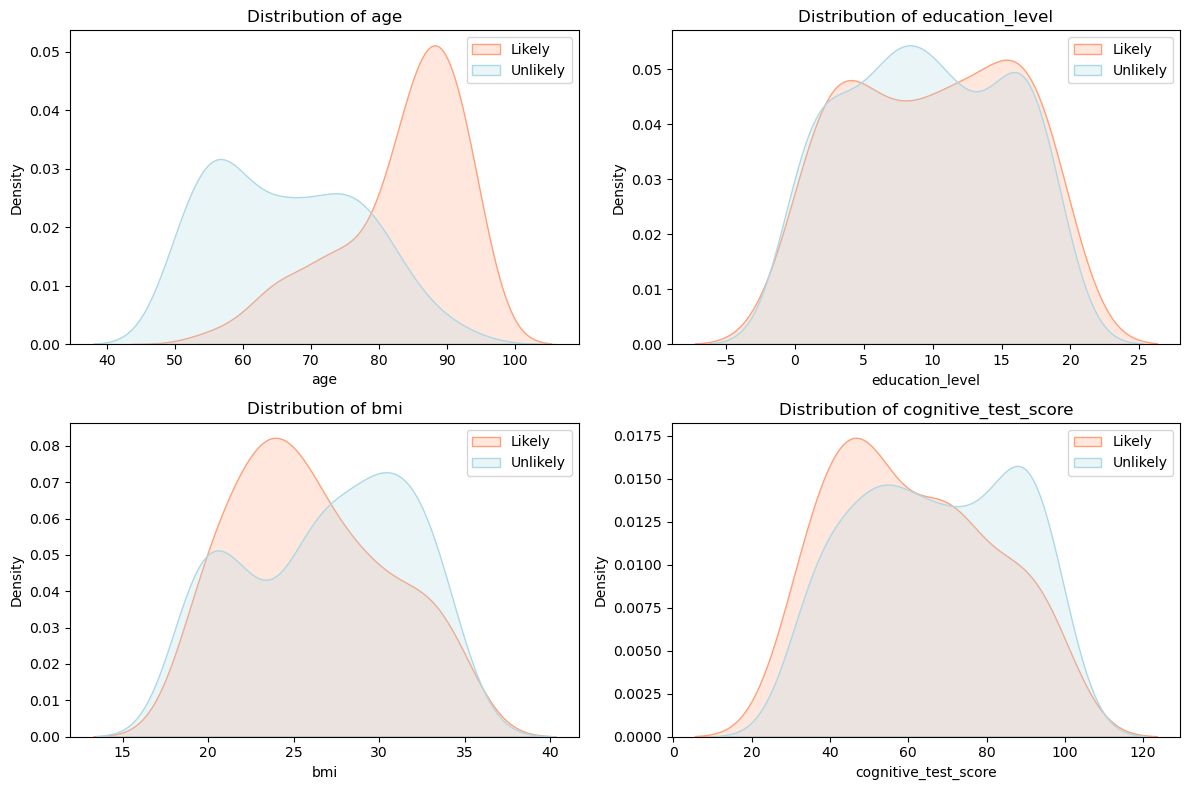

In [96]:
# Set up the subplot layout
n = len(con_features)
rows = (n + 1) // 2  # calculate number of rows needed for 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))

# Flatten axes for easier iteration
axes = axes.flatten()

for i, col in enumerate(con_features):
    ax = axes[i]
    sns.kdeplot(data=likely_patients, x=col, fill=True, label='Likely', color='lightsalmon', ax=ax)
    sns.kdeplot(data=unlikely_patients, x=col, fill=True, label='Unlikely', color='lightblue', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

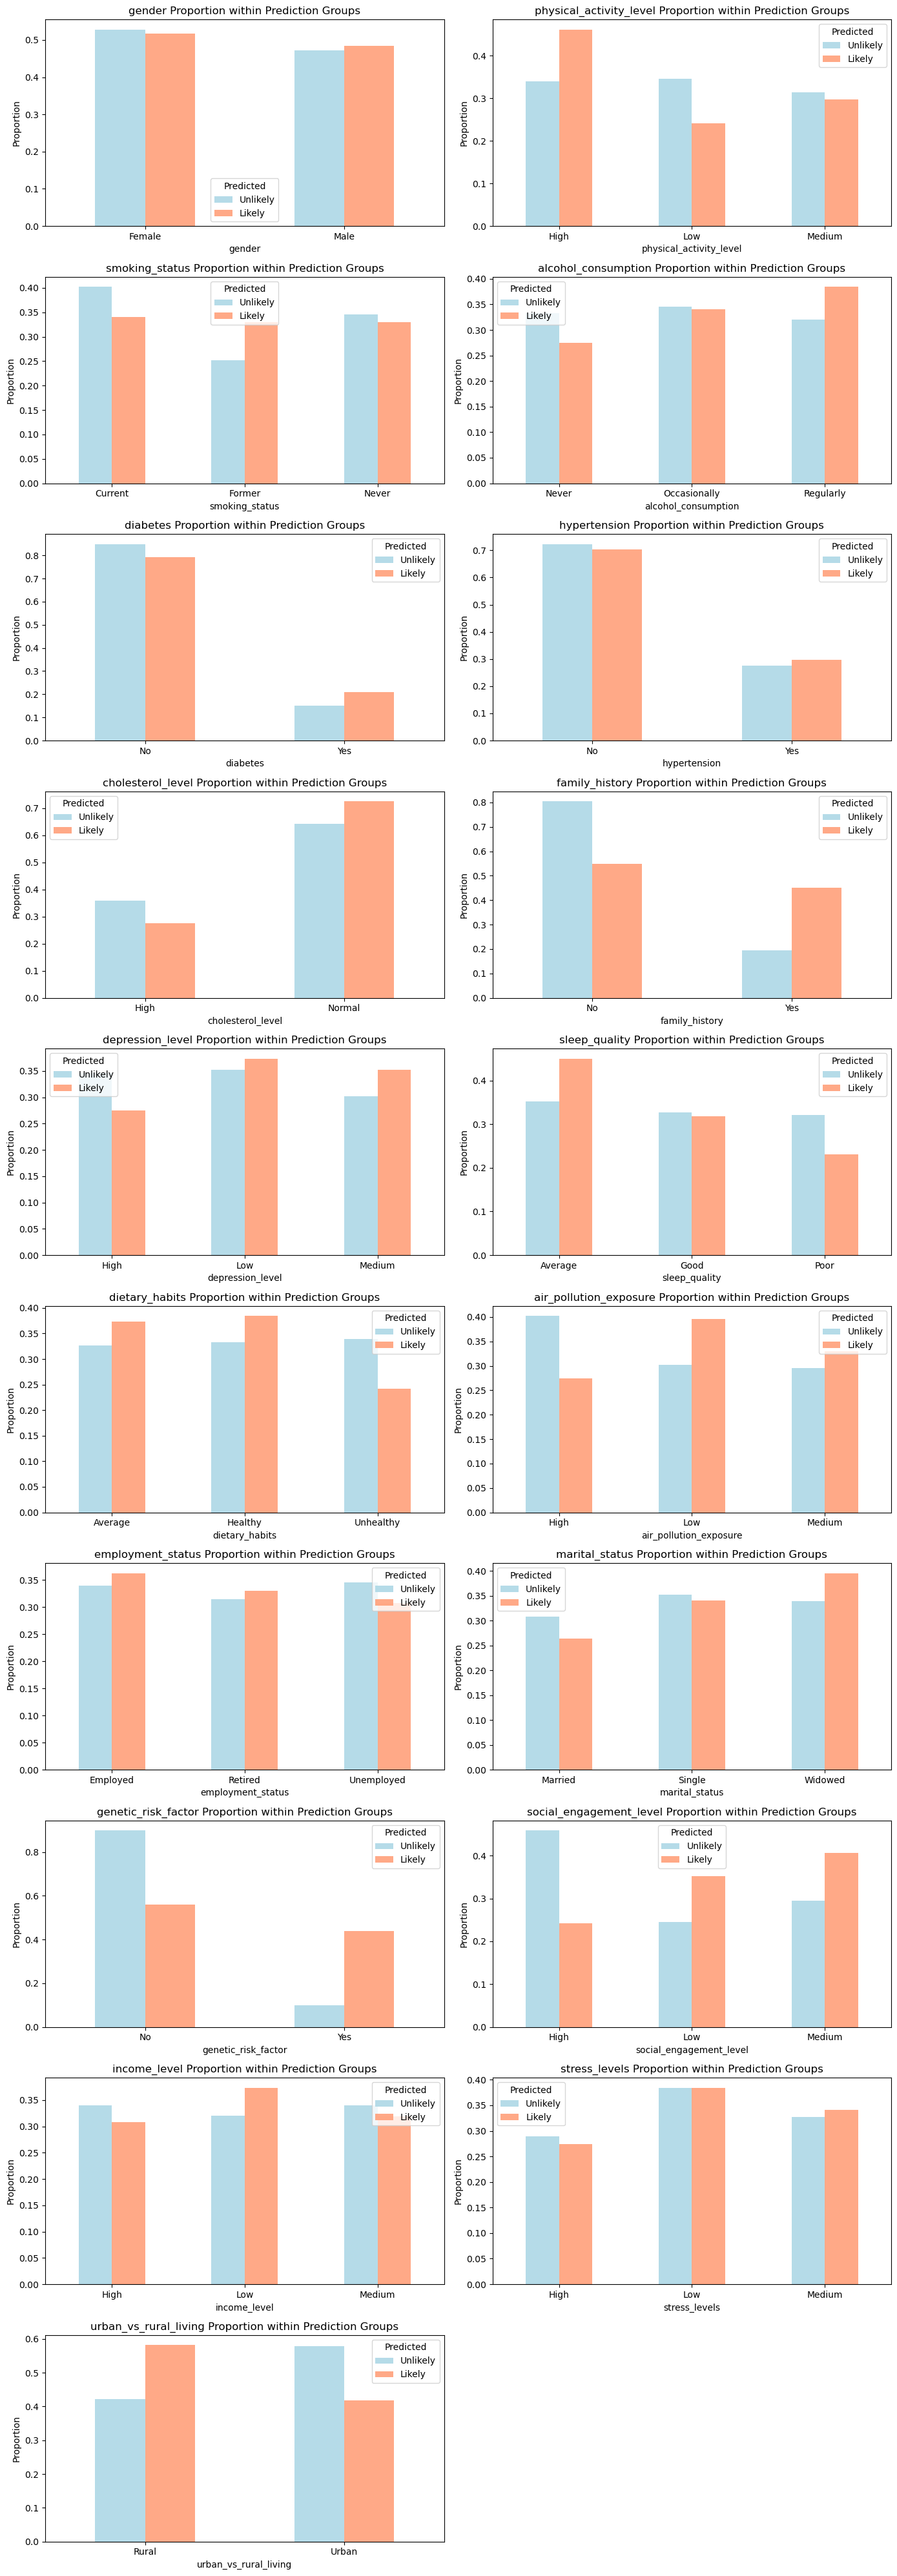

In [97]:
import matplotlib.pyplot as plt

cols = 2
rows = (len(cat_features) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    # 各群組中分類的比例
    cat_counts = pd.crosstab(result_df['predicted'], result_df[col], normalize='index')

    # 繪圖
    cat_counts.T.plot(kind='bar', ax=axes[i], rot=0, color=['lightblue', 'lightsalmon'], alpha = 0.9)

    axes[i].set_title(f'{col} Proportion within Prediction Groups')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Predicted', labels=['Unlikely', 'Likely'])

# 隱藏多餘圖框
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [98]:
# selected features: age, genetic_risk_factor, family_history, depression_level, sleep_quality, air_pollution_exposure, dietary_habits, physical_activity_level, social_engagement_level, alchohol_consumption

### Sensitivity Analysis

In [99]:
sen_data = pd.read_csv('Datasets/demo_dataset_lc.csv')
sen_data.head()

,Unnamed: 0,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,cholesterol_level,family_history,cognitive_test_score,depression_level,sleep_quality,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,alzheimers_diagnosis
0,1064,USA,90,Female,13,30.1,Medium,Current,Regularly,No,No,Normal,No,51,High,Average,Healthy,High,Employed,Married,No,Low,High,High,Urban,Yes
1,2230,USA,70,Female,4,33.7,Medium,Never,Occasionally,No,Yes,Normal,No,65,Medium,Good,Average,Low,Employed,Single,Yes,Low,Medium,High,Urban,No
2,422,USA,61,Male,15,24.7,Low,Never,Never,No,Yes,Normal,No,76,Low,Good,Healthy,Medium,Unemployed,Single,No,Medium,High,Medium,Rural,No
3,2249,USA,79,Female,13,19.7,High,Former,Never,No,No,Normal,No,56,Medium,Average,Healthy,High,Employed,Widowed,No,Medium,Low,Low,Rural,Yes
4,259,USA,58,Male,19,31.7,Low,Current,Never,Yes,Yes,Normal,No,98,Medium,Good,Unhealthy,High,Employed,Single,No,High,Medium,Low,Urban,No


#### Patient Risk

In [100]:
sample = sen_data.sample(1, random_state=35)
sample_f = sample[features]
sample_f

,genetic_risk_factor,family_history,depression_level,sleep_quality,air_pollution_exposure,dietary_habits,physical_activity_level,social_engagement_level,alcohol_consumption,age
2178,No,No,Medium,Average,Medium,Unhealthy,Medium,Low,Never,87


In [101]:
sample

,Unnamed: 0,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,cholesterol_level,family_history,cognitive_test_score,depression_level,sleep_quality,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,alzheimers_diagnosis
2178,3299,USA,87,Male,7,27.4,Medium,Never,Never,No,No,High,No,45,Medium,Average,Unhealthy,Medium,Employed,Single,No,Low,High,High,Urban,Yes


In [102]:
print(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['genetic_risk_factor',
                                                   'family_history',
                                                   'depression_level',
                                                   'sleep_quality',
                                                   'air_pollution_exposure',
                                                   'dietary_habits',
                                                   'physical_activity_level',
                                                   'social_engagement_level',
                                                   'alcohol_consumption']),
                                                 ('num', StandardScaler(),
       

In [103]:
best_model.predict_proba(sample_f)  # show baseline probability


array([[0.35031142, 0.64968858]])

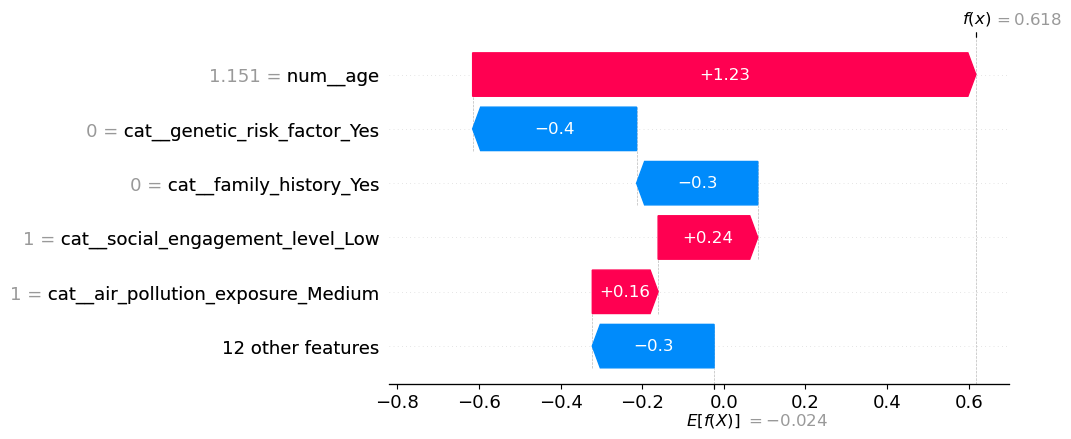

In [104]:
import shap

# Step 1: Separate model and preprocessor from your best pipeline
model_only = best_model.named_steps['model']
preprocessor_only = best_model.named_steps['preprocessor']

# Step 2: Preprocess your sample and training data
x_train_transformed = preprocessor_only.transform(x_train)
sample_transformed = preprocessor_only.transform(sample_f)

# 取得經過 one-hot encoding 後的欄位名稱
feature_names = preprocessor_only.get_feature_names_out()

# 再指定 feature_names 給 explainer
explainer = shap.Explainer(model_only, x_train_transformed, feature_names=feature_names)

# 再重新計算 shap_values
shap_values = explainer(sample_transformed)

# 畫出 waterfall 圖
shap.plots.waterfall(shap_values[0], max_display=6) #, max_display=6


In [105]:
from tabulate import tabulate

def explain_alzheimers_risk(shap_values, feature_names, top_n=5):
    shap_array = shap_values[0].values
    feature_contributions = list(zip(feature_names, shap_array))
    top_features = sorted(feature_contributions, key=lambda x: abs(x[1]), reverse=True)[:top_n]

    advice_dict = {
        'num__age': "Age is non-modifiable. Focus on healthy habits like physical activity and brain games.",
        'num__cognitive_test_score': "Engage in cognitive training or mentally stimulating activities.",
        'cat__family_history_Yes': "Family history increases risk. Consider regular screening and counseling.",
        'cat__genetic_risk_factor_Yes': "Genetic risk is fixed. Focus on controllable lifestyle factors.",
        'cat__social_engagement_level_Low': "Increase interaction: join clubs, call friends, or volunteer.",
        'cat__dietary_habits_Unhealthy': "Improve diet: follow Mediterranean or MIND diet.",
        'cat__physical_activity_level_Low': "Incorporate regular physical exercise, even light walking.",
        'cat__sleep_quality_Poor': "Improve sleep hygiene: fixed schedule, reduce screen use before bed.",
        'cat__air_pollution_exposure_Medium': "Stay indoors on polluted days, use air purifiers at home."
    }

    table = []
    for feature, shap_val in top_features:
        direction = "🔺 Increased risk" if shap_val > 0 else "🔻 Decreased risk"
    
        if shap_val > 0:  # Show advice only for increased risk
            advice = advice_dict.get(feature, "No specific advice available.")
        else:
            advice = "Patient is good here!"  # Leave it blank for decreased risk

        table.append([
            feature.replace('num_', '').replace('cat_', ''),
            direction,
            f"{shap_val:.2f}",
            advice
        ])

    print(tabulate(table, headers=["Feature", "Impact", "SHAP Value", "Recommended Action"], tablefmt="github"))

explain_alzheimers_risk(shap_values, feature_names)


| Feature                        | Impact            |   SHAP Value | Recommended Action                                                                     |
|--------------------------------|-------------------|--------------|----------------------------------------------------------------------------------------|
| _age                           | 🔺 Increased risk |         1.23 | Age is non-modifiable. Focus on healthy habits like physical activity and brain games. |
| _genetic_risk_factor_Yes       | 🔻 Decreased risk |        -0.4  | Patient is good here!                                                                  |
| _family_history_Yes            | 🔻 Decreased risk |        -0.3  | Patient is good here!                                                                  |
| _social_engagement_level_Low   | 🔺 Increased risk |         0.24 | Increase interaction: join clubs, call friends, or volunteer.                          |
| _air_pollution_exposure_Medium | 🔺 Increased ris

In [106]:
log_odds = explainer.expected_value + shap_values.values[0].sum()
prob = 1 / (1 + np.exp(-log_odds))
print(f"Risk of Getting Alzheimer's: {prob:.3f}")

if prob <= 0.3:
    print("Low risk of Alzheimer's.")
elif prob <= 0.7:
    print("Moderate risk of Alzheimer's.")
else:
    print("High risk of Alzheimer's.")


Risk of Getting Alzheimer's: 0.650
Moderate risk of Alzheimer's.


#### Sensitivity

In [107]:
def simulate_single_feature_improvement(pipeline, sample_row, feature_changes):
    original_prob = pipeline.predict_proba(sample_row)[0][1]
    original_pred = pipeline.predict(sample_row)[0]
    results = []

    for feature, changes in feature_changes.items():
        for from_val, to_val in changes:
            if sample_row[feature].iloc[0] == from_val:
                modified = sample_row.copy()
                modified.at[sample_row.index[0], feature] = to_val

                new_prob = pipeline.predict_proba(modified)[0][1]
                new_pred = pipeline.predict(modified)[0]

                results.append({
                    'Changed Feature': feature,
                    'From': from_val,
                    'To': to_val,
                    'Original Probability': round(original_prob, 4),
                    'New Probability': round(new_prob, 4),
                    'Difference': round(new_prob - original_prob, 4),
                    'Prediction Changed': new_pred != original_pred
                })

    return pd.DataFrame(results)



label_encodings = {
    'genetic_risk_factor': [('No', 'Yes'), ('Yes', 'No')],
    'family_history': [('No', 'Yes'), ('Yes', 'No')],
    'depression_level': [
        ('Medium', 'Low'), ('Medium', 'High'),
        ('Low', 'High'), ('Low', 'Medium'),
        ('High', 'Low'), ('High', 'Medium')
    ],
    'sleep_quality': [
        ('Average', 'Good'), ('Average', 'Poor'),
        ('Good', 'Average'), ('Good', 'Poor'),
        ('Poor', 'Good'), ('Poor', 'Average')
    ],
    'air_pollution_exposure': [
        ('Medium', 'Low'), ('Medium', 'High'),
        ('Low', 'Medium'), ('Low', 'High'),
        ('High', 'Low'), ('High', 'Medium')
    ],
    'dietary_habits': [
        ('Unhealthy', 'Healthy'), ('Unhealthy', 'Average'),
        ('Average', 'Healthy'), ('Average', 'Unhealthy'),
        ('Healthy', 'Unhealthy'), ('Healthy', 'Average')
    ],
    'physical_activity_level': [
        ('Medium', 'High'), ('Medium', 'Low'),
        ('Low', 'High'), ('Low', 'Medium'),
        ('High', 'Low'), ('High', 'Medium')
    ],
    'social_engagement_level': [
        ('Low', 'High'), ('Low', 'Medium'),
        ('Medium', 'High'), ('Medium', 'Low'),
        ('High', 'Low'), ('High', 'Medium')
    ],
    'alcohol_consumption': [
        ('Never', 'Occasionally'), ('Never', 'Regularly'),
        ('Regularly', 'Occasionally'), ('Regularly', 'Never'),
        ('Occasionally', 'Never'), ('Occasionally', 'Regularly')
    ]
}


simulate_single_feature_improvement(best_model, sample_f.iloc[[0]], label_encodings)


,Changed Feature,From,To,Original Probability,New Probability,Difference,Prediction Changed
0,genetic_risk_factor,No,Yes,0.6497,0.8968,0.2472,False
1,family_history,No,Yes,0.6497,0.7988,0.1491,False
2,depression_level,Medium,Low,0.6497,0.6862,0.0365,False
3,depression_level,Medium,High,0.6497,0.6347,-0.0150,False
4,sleep_quality,Average,Good,0.6497,0.6196,-0.0301,False
5,sleep_quality,Average,Poor,0.6497,0.5921,-0.0576,False
6,air_pollution_exposure,Medium,Low,0.6497,0.6718,0.0222,False
7,air_pollution_exposure,Medium,High,0.6497,0.5948,-0.0549,False
8,dietary_habits,Unhealthy,Healthy,0.6497,0.6527,0.0030,False
9,dietary_habits,Unhealthy,Average,0.6497,0.6831,0.0335,False


In [108]:
sample2 = sen_data.sample(1, random_state=65)
sample_f2 = sample2[features]
sample_f2

,genetic_risk_factor,family_history,depression_level,sleep_quality,air_pollution_exposure,dietary_habits,physical_activity_level,social_engagement_level,alcohol_consumption,age
252,No,No,High,Average,Low,Average,Low,High,Never,61


In [109]:
sample2

,Unnamed: 0,country,age,gender,education_level,bmi,physical_activity_level,smoking_status,alcohol_consumption,diabetes,hypertension,cholesterol_level,family_history,cognitive_test_score,depression_level,sleep_quality,dietary_habits,air_pollution_exposure,employment_status,marital_status,genetic_risk_factor,social_engagement_level,income_level,stress_levels,urban_vs_rural_living,alzheimers_diagnosis
252,2375,USA,61,Male,10,20.6,Low,Former,Never,Yes,No,Normal,No,91,High,Average,Average,Low,Retired,Single,No,High,Medium,Low,Urban,No


In [110]:
best_model.predict_proba(sample_f2) # (0,0)

array([[0.79585689, 0.20414311]])

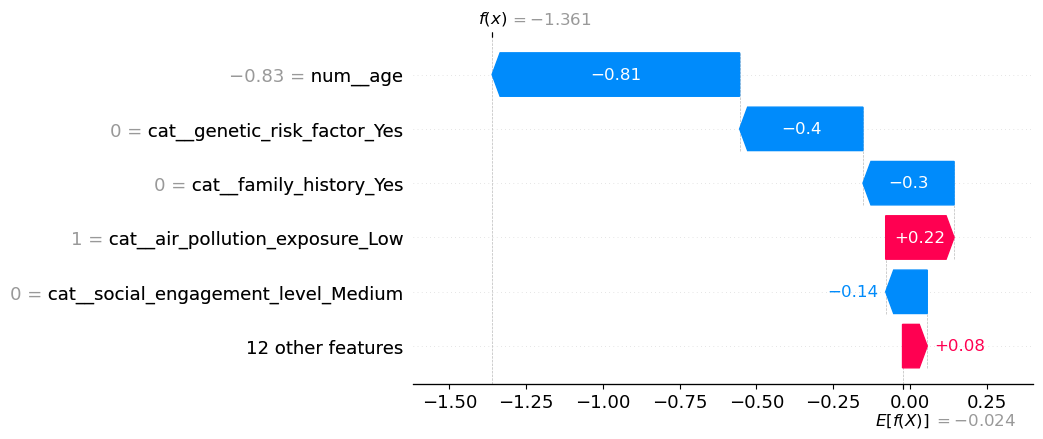

In [111]:
# Shap values for the second sample
sample_transformed2 = preprocessor_only.transform(sample_f2)
explainer2 = shap.Explainer(model_only, x_train_transformed, feature_names=feature_names)
shap_values2 = explainer(sample_transformed2)
shap.plots.waterfall(shap_values2[0], max_display=6) #, max_display=6

In [112]:
explain_alzheimers_risk(shap_values2, feature_names)

| Feature                         | Impact            |   SHAP Value | Recommended Action            |
|---------------------------------|-------------------|--------------|-------------------------------|
| _age                            | 🔻 Decreased risk |        -0.81 | Patient is good here!         |
| _genetic_risk_factor_Yes        | 🔻 Decreased risk |        -0.4  | Patient is good here!         |
| _family_history_Yes             | 🔻 Decreased risk |        -0.3  | Patient is good here!         |
| _air_pollution_exposure_Low     | 🔺 Increased risk |         0.22 | No specific advice available. |
| _social_engagement_level_Medium | 🔻 Decreased risk |        -0.14 | Patient is good here!         |


In [113]:
sample_f2

,genetic_risk_factor,family_history,depression_level,sleep_quality,air_pollution_exposure,dietary_habits,physical_activity_level,social_engagement_level,alcohol_consumption,age
252,No,No,High,Average,Low,Average,Low,High,Never,61


In [114]:
print("The original probability of getting Alzheimer's is: ", best_model.predict_proba(sample_f2)[0][1])
sample_f2_sen_age = sample_f2.copy()
sample_f2_sen_age['age'] = 78
print("The probability of getting Alzheimer's after changing age to 79 is: ", best_model.predict_proba(sample_f2_sen_age)[0][1])
# If age is mistyped as 79 (nearly 30% overstatement), the model will predict the patient as likely to have Alzheimer's.
# A change from 61 to 79 is substantial, not a small perturbation. If it shifts the prediction from unlikely to likely, it doesn’t necessarily mean the model is too sensitive — it could simply mean the model is behaving appropriately by assigning higher risk to much older individuals.

The original probability of getting Alzheimer's is:  0.20414310532458296
The probability of getting Alzheimer's after changing age to 79 is:  0.4931844108292495


In [115]:
print("The original probability of getting Alzheimer's is: ", best_model.predict_proba(sample_f2)[0][1])
sample_f2_sen_gen = sample_f2.copy()
sample_f2_sen_gen['genetic_risk_factor'] = 'Yes'
print("The probability of getting Alzheimer's after changing genetic_risk_factor to Yes: ", best_model.predict_proba(sample_f2_sen_gen)[0][1])

The original probability of getting Alzheimer's is:  0.20414310532458296
The probability of getting Alzheimer's after changing genetic_risk_factor to Yes:  0.545970694781834


In [116]:
sample_f2_sen_gen

,genetic_risk_factor,family_history,depression_level,sleep_quality,air_pollution_exposure,dietary_habits,physical_activity_level,social_engagement_level,alcohol_consumption,age
252,Yes,No,High,Average,Low,Average,Low,High,Never,61


In [117]:
simulate_single_feature_improvement(best_model, sample_f2.iloc[[0]], label_encodings)

,Changed Feature,From,To,Original Probability,New Probability,Difference,Prediction Changed
0,genetic_risk_factor,No,Yes,0.2041,0.5460,0.3418,True
1,family_history,No,Yes,0.2041,0.3545,0.1503,False
2,depression_level,High,Low,0.2041,0.2440,0.0399,False
3,depression_level,High,Medium,0.2041,0.2149,0.0108,False
4,sleep_quality,Average,Good,0.2041,0.1838,-0.0203,False
5,sleep_quality,Average,Poor,0.2041,0.1672,-0.0369,False
6,air_pollution_exposure,Low,Medium,0.2041,0.1886,-0.0156,False
7,air_pollution_exposure,Low,High,0.2041,0.1554,-0.0488,False
8,dietary_habits,Average,Healthy,0.2041,0.1827,-0.0214,False
9,dietary_habits,Average,Unhealthy,0.2041,0.1808,-0.0234,False
